<p style="padding: 10px;
          color:#FFFFFF;
          font-weight: bold;
          text-align: center;
          background-color:#006400;
          font-size:260%;">
Early Prediction of Sepsis
     </p>

<b>Problem Statement:</b> <p> Sepsis is a life-threatening condition that occurs when the body's response to infection causes tissue damage, organ failure, or death (Singer et al., 2016). In the U.S., nearly 1.7 million people develop sepsis and 270,000 people die from sepsis each year; over one third of people who die in U.S. hospitals have sepsis (CDC).</p>

<p>Early detection and antibiotic treatment of sepsis are critical for improving sepsis outcomes, where each hour of delayed treatment has been associated with roughly an 4-8% increase in mortality.</p>

<b>Overal Goal: </b><p>
**<span style="color:#008000;">The goal of this Hackathon series is the early detection of sepsis using physiological data.</span>**</p>

<b>Hackathon Part 2 Goal: </b><p>
**<span style="color:#008000;">The goal of this week hackathon is to analyse the effect of BASE EXCESS , ALKALINE PHOS and LACTATE on Sepsis Incidence</span>**</p>

<p style="padding: 10px;
          color:#FFFFFF;
          font-weight: bold;
          text-align: center;
          background-color:#006400;
          font-size:260%;">
Importing Libraries
     </p>

In [1]:
#  import the necessary libraries and load the files needed for Exploratory Data Analysis

import pandas as pd  # data manipulation
import numpy as np   # linear algebra
import seaborn as sns 
import matplotlib.pyplot as plt # matplotlib for plotting graphs

# %matplotlib inline renders plot inline on your page
%matplotlib inline

In [2]:
pip install hvplot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import hvplot.pandas
from scipy import stats

<p style="padding: 10px;
          color:#FFFFFF;
          font-weight: bold;
          text-align: center;
          background-color:#006400;
          font-size:260%;">
Loading Data
     </p>

In [3]:
# read the csv file and load to a dataframe
#Pre-requisite

#Location of dataset file
file = "Dataset.csv"

df = pd.read_csv(file)

<p style="padding: 10px;
          color:#FFFFFF;
          font-weight: bold;
          text-align: center;
          background-color:#006400;
          font-size:260%;">
Overview of Data
     </p>

In [4]:
# By default , python displays few rows and columns. 
# Set the below parameters so that all rows and columns would be visible

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [5]:
#Calculate the number of rows and columns in the sheet

df.shape

(1552210, 44)

In [6]:
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,NaN,26.0,0.4,NaN,NaN,NaN,NaN,23.0,NaN,9.6,104.0,0.8,NaN,161.0,NaN,1.6,2.1,3.2,NaN,NaN,29.7,9.5,30.6,11.3,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [7]:
df.tail()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
1552205,21,21,83.0,99.0,NaN,121.0,77.0,54.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,0,1.0,0.0,-2.93,22,0,113911
1552206,22,22,80.0,92.0,NaN,102.0,73.0,51.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,0,1.0,0.0,-2.93,23,0,113911
1552207,23,23,95.0,97.0,36.7,128.5,83.0,58.5,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,0,1.0,0.0,-2.93,24,0,113911
1552208,24,24,104.0,99.0,NaN,127.0,85.0,59.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,0,1.0,0.0,-2.93,25,0,113911
1552209,25,25,94.5,99.0,NaN,112.0,81.0,56.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,0,1.0,0.0,-2.93,26,0,113911


In [8]:
# display datatype of each column
df.dtypes

Unnamed: 0            int64
Hour                  int64
HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           

In [9]:
#check the statistics of all columns

df.describe(include="all")

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,1.552210e+06,1.552210e+06,1.398811e+06,1.349474e+06,525226.000000,1.325945e+06,1.358940e+06,1.065656e+06,1.313875e+06,57636.000000,84145.000000,65028.000000,129365.000000,107573.000000,86301.000000,53561.000000,25183.000000,106568.000000,24941.000000,91331.000000,70466.000000,94616.000000,2990.000000,265516.000000,41446.000000,97951.000000,62301.000000,144525.000000,23141.000000,14781.000000,137433.000000,114591.000000,45699.000000,99447.000000,10242.000000,92209.000000,1.552210e+06,1.552210e+06,940250.000000,940250.000000,1.552202e+06,1.552210e+06,1.552210e+06,1.552210e+06
mean,2.549274e+01,2.549274e+01,8.458144e+01,9.719395e+01,36.977228,1.237505e+02,8.240010e+01,6.383056e+01,1.872650e+01,32.957657,-0.689919,24.075481,0.554839,7.378934,41.021869,92.654188,260.223385,23.915452,102.483661,7.557531,105.827910,1.510699,1.836177,136.932283,2.646666,2.051450,3.544238,4.135528,2.114059,8.290099,30.794093,10.430833,41.231193,11.446405,287.385706,196.013911,6.200947e+01,5.592690e-01,0.496571,0.503429,-5.612512e+01,2.699499e+01,1.798468e-02,5.920148e+04
std,2.888256e+01,2.888256e+01,1.732524e+01,2.936924e+00,0.770014,2.323156e+01,1.634175e+01,1.395601e+01,5.098194e+00,7.951662,4.294297,4.376504,11.123207,0.074568,9.267242,10.892986,855.746795,19.994317,120.122746,2.433152,5.880462,1.805603,3.694082,51.310728,2.526214,0.397898,1.423286,0.642150,4.311468,24.806235,5.491749,1.968661,26.217669,7.731013,153.002908,103.635366,1.638622e+01,4.964749e-01,0.499989,0.499989,1.622569e+02,2.900542e+01,1.328956e-01,5.024819e+04
min,0.000000e+00,0.000000e+00,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,10.000000,-32.000000,0.000000,-50.000000,6.620000,10.000000,23.000000,3.000000,1.000000,7.000000,1.000000,26.000000,0.100000,0.010000,10.000000,0.200000,0.200000,0.200000,1.000000,0.100000,0.010000,5.500000,2.200000,12.500000,0.100000,34.000000,1.000000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,9.000000e+00,9.000000e+00,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,5.400000e+01,1.500000e+01,28.000000,-3.000000,22.000000,0.400000,7.340000,35.000000,94.000000,22.000000,12.000000,54.000000,7.700000,102.000000,0.700000,0.200000,106.000000,1.260000,1.800000,2.600000,3.700000,0.500000,0.040000,27.000000,9.100000,27.800000,7.600000,184.000000,126.000000,5.168000e+01,0.000000e+00,0.000000,0.000000,-4.705000e+01,1.100000e+01,0.000000e+00,9.990000e+03
50%,1.900000e+01,1.900000e+01,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,33.000000,0.000000,24.000000,0.500000,7.380000,40.000000,97.000000,41.000000,17.000000,74.000000,8.300000,106.000000,0.940000,0.445000,127.000000,1.800000,2.000000,3.300000,4.100000,0.900000,0.300000,30.300000,10.300000,32.400000,10.300000,250.000000,181.000000,6.400000e+01,1.000000e+00,0.000000,1.000000,-6.030000e+00,2.100000e+01,0.000000e+00,1.996500e+04
75%,3.300000e+01,3.300000e+01,9.550000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,7.200000e+01,2.150000e+01,38.000000,1.000000,26.800000,0.600000,7.430000,45.000000,98.000000,111.000000,28.000000,108.000000,8.700000,109.000000,1.430000,1.700000,153.000000,3.000000,2.200000,4.100000,4.400000,1.700000,3.980000,34.100000,11.700000,42.800000,13.800000,349.000000,244.000000,7.400000e+01,1.000000e+00,1.000000,1.000000,-4.000000e-02,3.400000e+01,0.000000e+00,1.098780e+05
max,3.350000e+02,3.350000e+02,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,100.000000,100.000000,55.000000,4000.000000,7.930000,100.000000,100.000000,9961.000000,268.000000,3833.000000,27.9

In [10]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(1552210, 43)

Important parameters like minimum value , maximum value , count , mean etc of all the columns can be seen using describe command.

columns belong to int , float , datetime and object datatypes.

<p style="padding: 10px;
          color:#FFFFFF;
          font-weight: bold;
          text-align: center;
          background-color:#006400;
          font-size:260%;">
Analysis of Missing Values
     </p>

<Axes: >

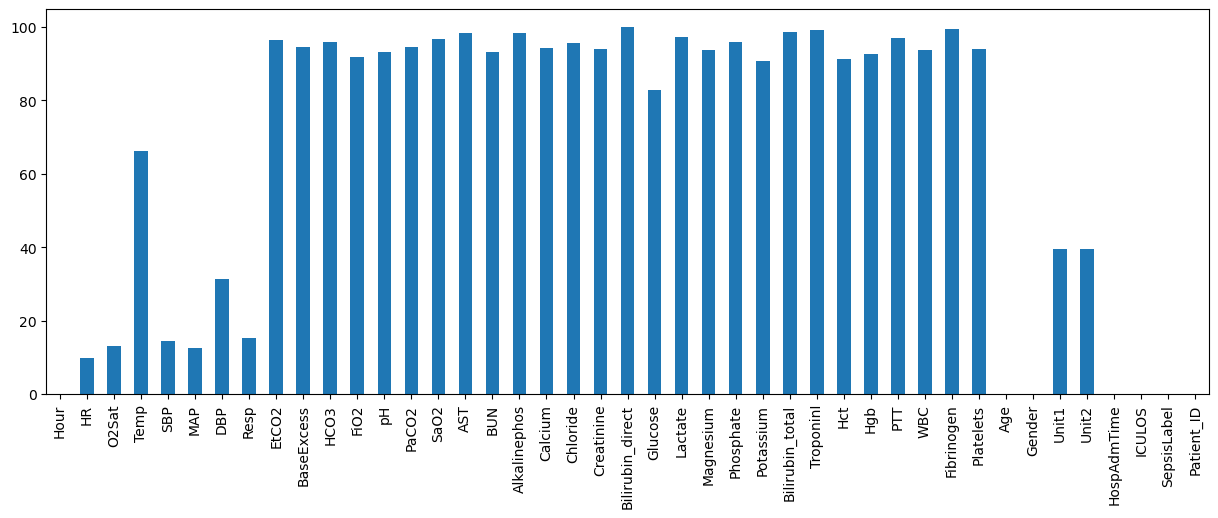

In [12]:
round(100*(df.isnull().sum()/len(df.index)),2).plot.bar(figsize=(15,5))

### For all lab values , more than 80% of data are missing

As we can see from the plot, it is a case of severe data imbalance . There are multiple methods that we could try to balance it (Over sampling or Undersampling) or even proceed without balancing
but we chose to select only the patients who contracted sepsis before or after admission to ICU

<p style="padding: 10px;
          color:#FFFFFF;
          font-weight: bold;
          text-align: center;
          background-color:#006400;
          font-size:260%;">
Data Preprocessing
     </p>

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Divide patients to 3 types - NonSepsis, SepsisAfterAdm , SepsisBeforeAdm
     </p>

In [11]:
# get the list of patients who have sepsis
septic_shock_patients=df['Patient_ID'][df['SepsisLabel']==1].unique()
print('Patient who have sepsis : ',septic_shock_patients.shape)

Patient who have sepsis :  (2932,)


In [12]:
# construct dataframe of patients with sepsis alone
septic_df=df[df.Patient_ID.isin(septic_shock_patients)]

In [13]:
# get the list of patients who have sepsis before admission to ICU
admitted_with_sepsis_patients=df['Patient_ID'][(df['SepsisLabel']==1) & (df['Hour']==0)]
print(admitted_with_sepsis_patients.shape)

(426,)


In [14]:
# construct dataframe of patients who have sepsis before admission to ICU
admitted_with_sepsis_df=df[df.Patient_ID.isin(admitted_with_sepsis_patients)]
print(admitted_with_sepsis_df.shape)

(3646, 43)


In [15]:
# construct dataframe of patients who have sepsis after admission to ICU
sepsis_after_adm_df=septic_df.merge(admitted_with_sepsis_df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
print(sepsis_after_adm_df.shape)

(168764, 44)


In [16]:
# construct dataframe of patients who have no sepsis
non_septic_df = df.merge(septic_df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
print(non_septic_df.shape)

(1379800, 44)


In [17]:
# add a new column sepsisType in dataframe with value null
df['sepsisType']=np.nan

In [18]:
# update sepsisType to SepsisBeforeAdm for patients who were admitted to ICU with sepsis
df.loc[df.Patient_ID.isin(admitted_with_sepsis_patients), 'sepsisType'] = 'SepsisBeforeAdm'

In [19]:
# update sepsisType to SepsisAfterAdm for patients who contracted sepsis after admission to ICU
df.loc[df.Patient_ID.isin(septic_shock_patients) & df['sepsisType'].isnull(), 'sepsisType'] = 'SepsisAfterAdm'

In [20]:
# update sepsisType to NonSepsis for patients who never got Sepsis
df.loc[df['sepsisType'].isnull(), 'sepsisType'] = 'NonSepsis'

In [21]:
df['sepsisType'].value_counts()

sepsisType
NonSepsis          1379800
SepsisAfterAdm      168764
SepsisBeforeAdm       3646
Name: count, dtype: int64

<Axes: xlabel='sepsisType'>

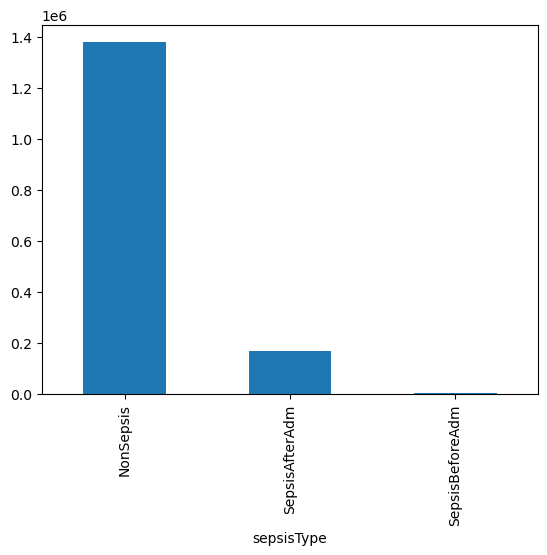

In [22]:
df['sepsisType'].value_counts().plot.bar()

In [23]:
df.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,sepsisType
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072,NonSepsis
1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072,NonSepsis
2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072,NonSepsis
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072,NonSepsis
4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,NaN,26.0,0.4,NaN,NaN,NaN,NaN,23.0,NaN,9.6,104.0,0.8,NaN,161.0,NaN,1.6,2.1,3.2,NaN,NaN,29.7,9.5,30.6,11.3,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072,NonSepsis


In [24]:
#total no:of patients
len(pd.unique(df['Patient_ID']))

40336

In [25]:
#total number of septic patients whose are sepsis after admission
len(pd.unique(sepsis_after_adm_df['Patient_ID']))

#len(pd.unique(non_septic_df['Patient_ID']))

2506

In [26]:
#total no:of septic patients
len(pd.unique(septic_df['Patient_ID']))

2932

In [27]:
#total number of septic patients whose are sepsis before admission
len(pd.unique(admitted_with_sepsis_df['Patient_ID']))

426

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Calculate SIRS
     </p>

In [28]:
#df['hasSIRS'] = np.where(df['Temp']!= '[]', True, False)
condition=(np.isnan(df['Temp'])& np.isnan(df['HR'])& np.isnan(df['Resp']) &np.isnan(df['WBC']))

In [29]:
df['hasSIRS'] = np.where(condition, 1, 0)

In [30]:
df['hasSIRS'].value_counts()

hasSIRS
0    1408039
1     144171
Name: count, dtype: int64

In [31]:
condition_temp=(df['Temp']>38) |( df['Temp']<36)
condition_HR=(df['HR']>90)
condition_Resp=(df['Resp']>20) |( df['PaCO2']<32)
condition_wbc=(df['WBC']>12000) |( df['WBC']<4000)

In [32]:
df['SIRS_Score']=np.where(condition_temp, 1, 0)+np.where(condition_HR, 1, 0)+np.where(condition_Resp, 1, 0)+np.where(condition_wbc, 1, 0)

In [33]:
df['SIRS_Score'].value_counts()

SIRS_Score
0    770512
1    532866
2    221739
3     26056
4      1037
Name: count, dtype: int64

<Axes: xlabel='SIRS_Score'>

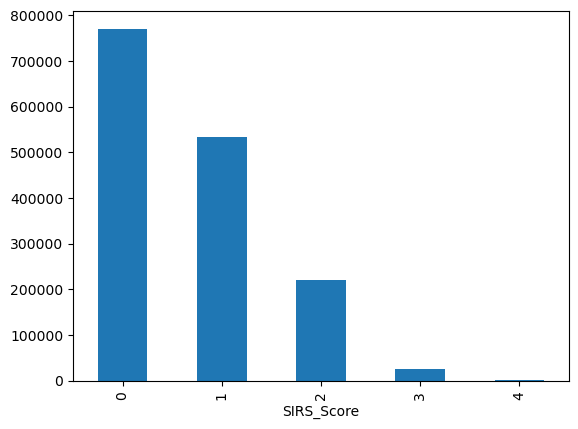

In [34]:
df['SIRS_Score'].value_counts().plot.bar()

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Export CSV with SepsisType and SIRS Score
     </p>

In [37]:
#df.to_csv('sepsistype_updated_df.csv')

<p style="padding: 10px;
          color:#FFFFFF;
          font-weight: bold;
          text-align: center;
          background-color:#006400;
          font-size:260%;">
Exploratory Data Analysis
     </p>

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Bar Charts
     </p>

In [35]:
df.SepsisLabel.value_counts().hvplot.bar(
    title="Sepsis Count", xlabel='Sepsis Lebel', ylabel='Count', 
    width=500, height=350
)

:Bars   [SepsisLabel]   (count)

In [36]:
have_disease = df.loc[df['SepsisLabel']==1, 'Gender'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = df.loc[df['SepsisLabel']==0, 'Gender'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Sepsis by Gender", xlabel='Gender', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [Gender]   (count)
   .Bars.Count.II :Bars   [Gender]   (count)

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Histograms
     </p>

<Axes: xlabel='Lactate', ylabel='Count'>

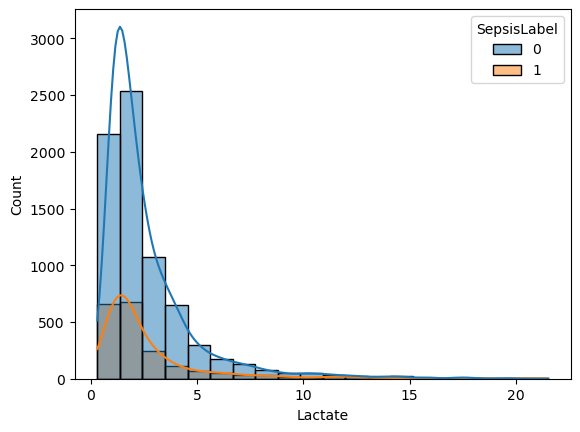

In [37]:
sns.histplot(data=septic_df, x="Lactate",hue="SepsisLabel", kde=True,bins=20)

<Axes: xlabel='BaseExcess', ylabel='Count'>

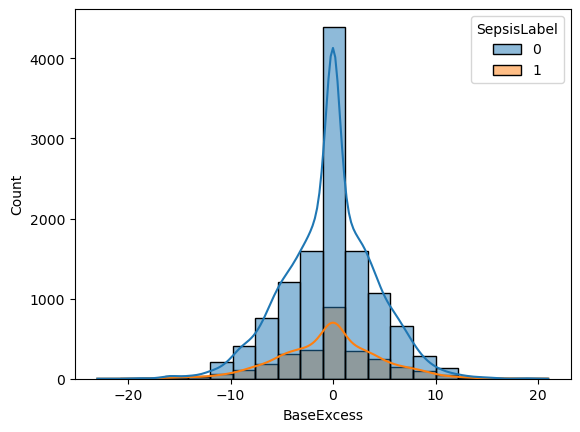

In [38]:
sns.histplot(data=septic_df, x="BaseExcess",hue="SepsisLabel", kde=True,bins=20)

<Axes: xlabel='Alkalinephos', ylabel='Count'>

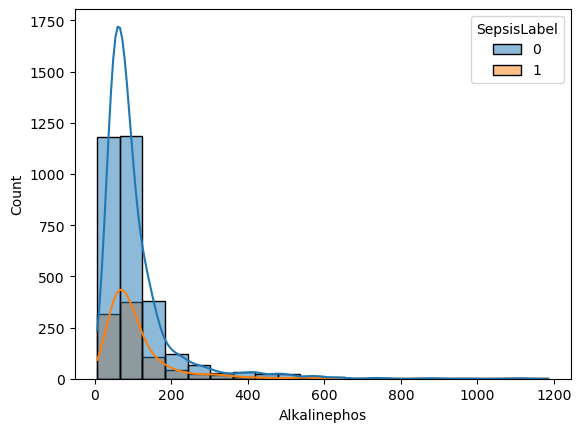

In [39]:
sns.histplot(data=septic_df, x="Alkalinephos",hue="SepsisLabel", kde=True,bins=20)

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Boxplot
     </p>

<Axes: >

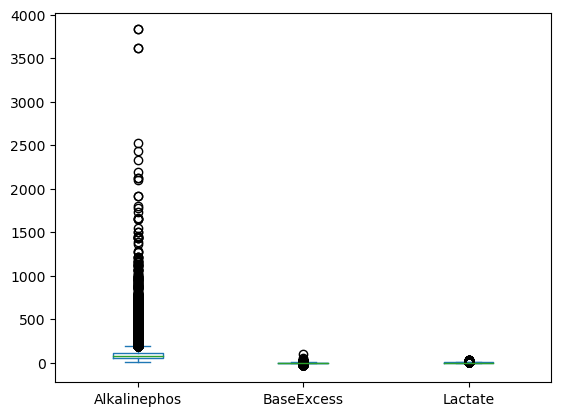

In [40]:
df[['Alkalinephos','BaseExcess','Lactate']].plot(kind='box')

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Correlation
     </p>

(3.5, -0.5)

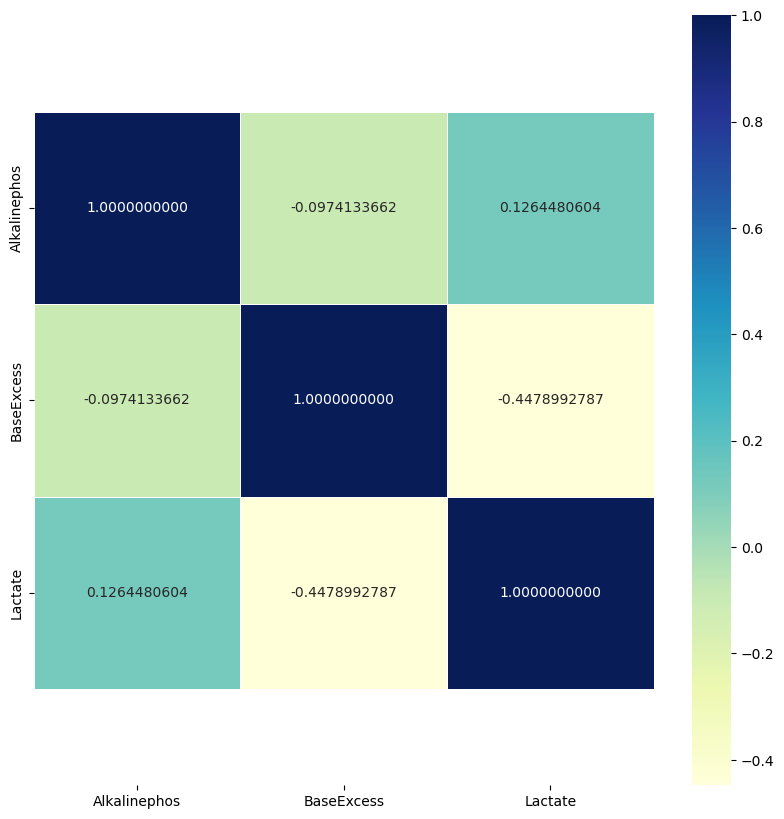

In [41]:
# Let's make our correlation matrix a little prettier
corr_matrix = df[['Alkalinephos','BaseExcess','Lactate']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".10f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
df.drop('SepsisLabel', axis=1).corrwith(df.SepsisLabel).hvplot.barh(
    width=600, height=650, 
    title="Correlation between Sepsis and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

In [ ]:
data1=df.loc[:, ['BaseExcess', 'Lactate','Alkalinephos','SepsisLabel']]

In [47]:
data1.drop('SepsisLabel', axis=1).corrwith(data1.SepsisLabel).hvplot.barh(
    width=400, height=400, 
    title="Correlation between Sepsis and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

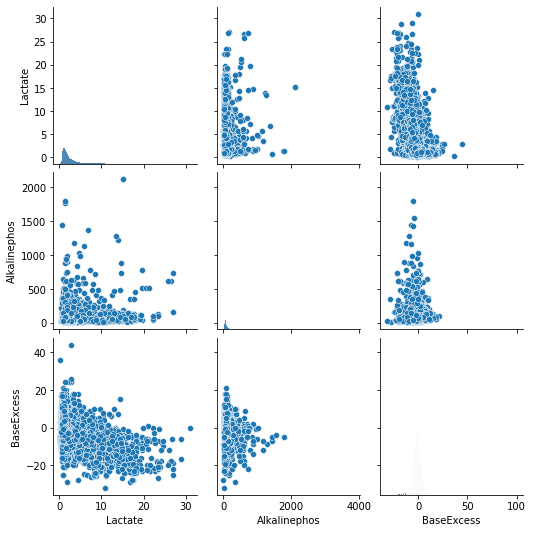

In [48]:
sns_plot=sns.pairplot(df,vars=['Lactate','Alkalinephos','BaseExcess'])
#sns_plot.savefig("pairplot.png")